In [2]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import leaves_list
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv("/Users/cmdb/qbb2021-answers/week9/all_annotated.csv")

In [4]:
df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [5]:
#df.gene_name.value_counts()

In [11]:
x=df.median(axis=1)
x


3          18.002343
8           7.408367
9          16.617589
10         51.024830
11         74.296821
            ...     
34663      71.833485
34665     211.546905
34667    1913.698243
34684       0.026254
34715       2.037699
Length: 8613, dtype: float64

In [12]:
y= x > 0
#subset only inculde the ones where it is true

df=df.loc[y]
df
#set t_names as index and get rid of gene_name

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [13]:
df1=df.set_index("t_name")
df1

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090


In [14]:
df2=df1.drop("gene_name", 1)
df2

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,
FBtr0302347,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
FBtr0113885,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
FBtr0301810,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
FBtr0113895,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
FBtr0345179,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
FBtr0100886,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
FBtr0100888,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090


In [15]:
#df3=df2.drop("median", 1)
#df3

In [16]:
transform=np.log2(df2 + 0.1)
transform

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,
FBtr0302347,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
FBtr0113885,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
FBtr0301810,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
FBtr0113895,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
FBtr0345179,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
FBtr0100886,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
FBtr0100888,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [17]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [18]:
linkage_matrix=linkage(transform)
linkage_matrix

array([[1.32300000e+03, 1.32400000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.16300000e+03, 2.16400000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.36800000e+03, 4.36900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.93200000e+03, 1.72210000e+04, 1.30964034e+01, 8.61100000e+03],
       [4.80000000e+02, 1.72220000e+04, 1.32621231e+01, 8.61200000e+03],
       [2.71000000e+03, 1.72230000e+04, 1.46562268e+01, 8.61300000e+03]])

In [20]:
leaves=leaves_list(linkage_matrix)
leaves

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
transcripts=transform.iloc[leaves,:]
transcripts

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,
FBtr0076479,10.362427,9.674967,10.730739,10.533361,10.186101,9.915343,11.627885,6.513012,-3.321928,9.911055,9.153596,11.041927,9.669459,10.594618,-3.321928,9.770807
FBtr0334681,5.834810,4.495864,5.910958,6.306998,-3.321928,-3.321928,-3.321928,6.690422,-3.321928,5.681848,5.848470,-3.321928,6.838377,6.329519,-3.321928,-3.321928
FBtr0302223,6.116518,-3.321928,6.332019,-3.321928,7.029427,7.333518,-3.321928,-3.321928,6.008203,6.486714,6.112357,-3.321928,6.888902,-3.321928,-3.321928,-3.321928
FBtr0082136,10.616585,9.584416,10.723743,10.903922,11.426619,11.456581,11.891232,11.521811,10.592872,9.876014,10.790580,11.210067,11.347327,10.977238,-3.321928,11.715662
FBtr0086092,5.608112,-3.321928,-3.321928,6.886073,-3.321928,4.775450,-3.321928,7.226825,4.165947,5.750684,3.429699,6.536656,4.906105,-3.321928,4.011398,6.482741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0089617,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928
FBtr0343356,3.928964,4.456723,2.938631,2.515062,3.133134,2.203526,-3.321928,-3.321928,4.032783,3.644903,4.015114,3.918539,3.082398,3.742785,1.904281,-3.321928
FBtr0070627,3.654464,3.595382,5.371957,4.142772,4.846243,4.190093,-3.321928,-3.321928,2.719274,4.244179,4.159932,3.524966,5.205921,5.551469,1.252376,-3.321928


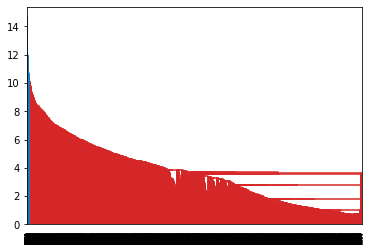

In [28]:
#Creating a dendrogram by genes
import sys
sys.setrecursionlimit(10_000)
plt.figure()
dendrogram(linkage_matrix)
plt.show()

<AxesSubplot:ylabel='t_name'>

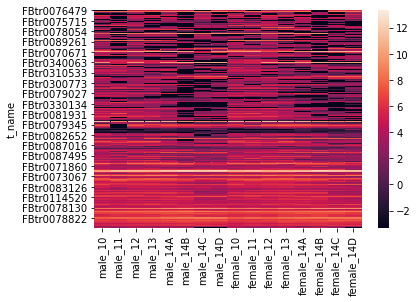

In [23]:
#Creating a heatmap by genes
sns.heatmap(transcripts)

In [33]:
#Clustering by samples
sample_z=linkage(transform.T)

In [36]:
sample_leaves=leaves_list(sample_z)
samples=transform.T.iloc[:,sample_leaves]

<AxesSubplot:xlabel='t_name'>

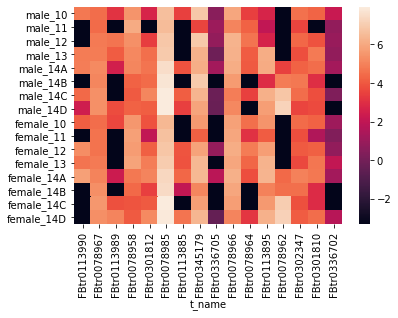

In [37]:
#Creating a heatmap by samples
sns.heatmap(samples)

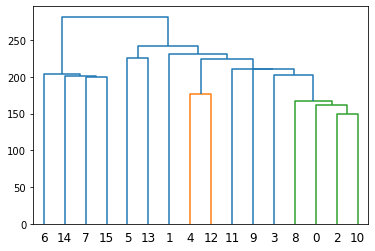

In [38]:
#Creating a dendrogram by samples
import sys
sys.setrecursionlimit(10_000)
plt.figure()
dendrogram(sample_z)
plt.show()

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [66]:
transform.columns=[['male','male','male','male','male','male','male','male','female','female','female','female','female','female','female','female'],[10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]]
transform

male                                                      \
                    10        11        12         13         14        14   
t_name                                                                       
FBtr0302347   4.573651  3.593093  4.383186   3.772605   4.240476  4.749679   
FBtr0113885   3.472120 -3.321928 -3.321928  -3.321928   3.897757 -3.321928   
FBtr0301810   4.260622 -3.321928  3.900371   4.801878   4.484797  2.990301   
FBtr0113895   2.681610  2.012708  2.665469   6.130167   6.072718  2.945977   
FBtr0345179   6.899972  3.552258  6.909741   6.245611   6.188155  6.953605   
...                ...       ...       ...        ...        ...       ...   
FBtr0100884   5.063561  0.209330  3.312209   8.696872   6.681296  4.675181   
FBtr0100886   4.661599 -0.437467  4.418274   9.014515   8.350559  5.778312   
FBtr0100888  11.191931  5.095088  9.857502  12.271701  11.136488  9.213941   
FBtr0114261  -2.534805 -3.321928 -2.348207  -2.301821  -3.321928 -3.321928   
FBtr0114216   1.078063 -3.321928  3.016877   1.113834   1.696735 -3.321928   

                                      female                                  \
                    14         14         10        11         12         13   
t_name                                                                         
FBtr0302347   4.518529   3.558602   4.459054  3.809626   4.051558   3.669331   
FBtr0113885   4.145813   3.436875  -3.321928 -3.321928   3.905799   3.869772   
FBtr0301810   3.801070   3.701063   4.222705  1.594158   4.209672   4.729653   
FBtr0113895   6.230339   5.750615   5.486961  4.081859   5.728691   6.286330   
FBtr0345179   6.345793   5.901059   5.602316  4.196805   5.844084   6.439396   
...                ...        ...        ...       ...        ...        ...   
FBtr0100884   6.166922   6.945737   6.905339 -0.371506   5.597221   6.170259   
FBtr0100886   8.493319   7.797501   8.259794  1.172241   7.649749   8.615611   
FBtr0100888  11.283776  10.690080  11.332554  6.260317  11.087133  11.867576   
FBtr0114261  -3.321928  -2.143405   0.003268 -3.321928  -3.321928  -1.927886   
FBtr0114216   0.695194   3.215803   3.762950  0.904145   2.247730   2.828667   

                                                      
                   14        14        14         14  
t_name                                                
FBtr0302347  4.995485  4.522507  3.851021   4.112914  
FBtr0113885  4.353582  2.066050 -3.321928   4.665883  
FBtr0301810  4.784754  2.913181  2.897078   4.516802  
FBtr0113895  6.338167  4.998373  5.621212   6.280001  
FBtr0345179  6.453632  5.113628  5.736589   6.410012  
...               ...       ...       ...        ...  
FBtr0100884  7.891809  5.452891  6.239269   7.386673  
FBtr0100886  8.760742  4.441070  6.523595   9.412730  
FBtr0100888  6.942632  8.818194  9.435277  12.153787  
FBtr0114261 -1.913863 -3.321928 -3.321928  -2.713053  
FBtr0114216  2.808283 -0.095642  0.323943   1.060677  

[8613 rows x 16 columns]

In [67]:
combined=transform.melt(id_vars=None, value_name='values')
combined.columns=['sex','stage','values']
combined['sex']=combined['sex'].replace({'male':0,'female':1})
combined

,sex,stage,values
0,0,10,4.573651
1,0,10,3.472120
2,0,10,4.260622
3,0,10,2.681610
4,0,10,6.899972
...,...,...,...
137803,1,14,7.386673
137804,1,14,9.412730
137805,1,14,12.153787
137806,1,14,-2.713053


In [79]:
model_1=smf.ols(formula="values ~ stage", data=combined)
model_1=model_1.fit()
p=model_1.pvalues[1]
p

1.9351808509064907e-284

In [68]:
t_names=list(transform.index)
p_values=[]

for gene in list(transform.index):
    data=transform.loc[gene]
    data=data.reset_index(level=[0,1])
    data.columns=['sex','stage','values']
    
    model_1=smf.ols(formula="values ~ stage", data=combined)
    model_1=model_1.fit()
    p=model_1.pvalues[1]
    p_values.append(p)

In [89]:

p_values_sex=[]

for gene in list(transform.index):
    data=transform.loc[gene]
    data=data.reset_index(level=[0,1])
    data.columns=['sex','stage','values']
    
    model_1=smf.ols(formula="values ~ stage + sex", data=combined)
    model_2=model_1.fit()
    p=model_2.pvalues[1]
    p_values_sex.append(p)

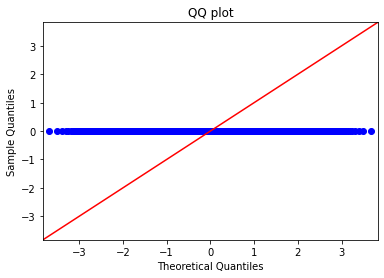

In [93]:
fig=sm.qqplot(data=np.array(p_values_sex),line='45')
plt.title("QQ plot")
plt.show()

In [88]:
transform.loc[gene['p_values']>0.05].index

TypeError: string indices must be integers